In [4]:
%%html

<style>    
    @import url("css/custom_styles.css")
</style>

In [26]:
import random
from sklearn.model_selection import train_test_split
%matplotlib inline

#
# import utilitaires
#
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import helpers as hlp
import helpers.dataset.PlantVillage as pv
import helpers.features as feat

In [6]:
#
# parametres dataset PlantVillage
#
config_overrides = hlp.MetaObject.from_json("config_overrides.json")
executor = hlp.create_thread_pool_executor(max_workers=None)

pv_config = pv.Config(executor)
if not config_overrides is None:
    hlp.MetaObject.override_from_object(pv_config, 
                                        config_overrides.dataset)

print("pv_config")
display(vars(pv_config))

#
# obtenir le dataset PlantVillage
#
with hlp.Profile() as pv_loading:
    pv_dataset = pv.load(pv_config)

    if pv_dataset is None:
        print("Invalid dataset")
    else:
        pv_dataframe = pv_dataset.dataframe

print(f"Loading dataset: {round(pv_loading.duration, 2)}s")
print("PlantVillage", pv_dataframe.shape)

pv_config


{'url': 'https://tinyurl.com/22tas3na',
 'install_path': 'dataset/PlantVillage.hd5',
 'species_disease_re': '(.*)(?:___)(.*)',
 'species_re': '(.*)(?:,_|_)(.*)',
 'label_separator': '_',
 'thumbnail_scale': 0.25,
 'force_download': False,
 'read_only': True,
 'executor': <concurrent.futures.thread.ThreadPoolExecutor at 0x1137b22de20>,
 'force_install': False}

Loading dataset: 0.66s
PlantVillage (60343, 5)


In [7]:
df = pv_dataset.dataframe[["label", "species"]]

In [8]:
nbLabel = df.groupby("label").count()
#print(nbLabel)

In [9]:
nbEspece = df.groupby("species").count()
print(nbEspece)

              label
species            
Apple          4645
Blueberry      1502
Cherry         2052
Corn           4354
Grape          4639
Orange         5507
Peach          3297
Pepper,_bell   2478
Potato         3000
Raspberry      1000
Soybean        5090
Squash         1835
Strawberry     2109
Tomato        18835


In [10]:
healthy_crit = df["label"].str.contains("healthy")
healthy = df[healthy_crit]
healthy = healthy.groupby("species").count()

not_healthy = df[~healthy_crit]
not_healthy = not_healthy.groupby("species").count()
print('Healthy:\n',healthy)
print('Not healthy:\n',not_healthy)

Healthy:
               label
species            
Apple          1645
Blueberry      1502
Cherry         1000
Corn           1162
Grape          1000
Peach          1000
Pepper,_bell   1478
Potato         1000
Raspberry      1000
Soybean        5090
Strawberry     1000
Tomato         1591
Not healthy:
               label
species            
Apple          3000
Cherry         1052
Corn           3192
Grape          3639
Orange         5507
Peach          2297
Pepper,_bell   1000
Potato         2000
Squash         1835
Strawberry     1109
Tomato        17244


On enlève donc Blueberry, Soybean, Rasberry, Squash et Orange parce qu'ils ne sont pas représenté dans les deux catégories (healthy et not healthy).

In [11]:
df1 = pv_dataset.dataframe

searchfor = ["Apple", "Cherry", "Corn", "Grape", "Peach", "Pepper,_bell", "Potato", "Strawberry", "Tomato"]
group_sel = df1[df1["label"].str.contains('|'.join(searchfor))]
# in 
t = group_sel.groupby("species").count()

print(t)

              disease  label  image_path  thumbnail_path
species                                                 
Apple            4645   4645        4645            4645
Cherry           2052   2052        2052            2052
Corn             4354   4354        4354            4354
Grape            4639   4639        4639            4639
Peach            3297   3297        3297            3297
Pepper,_bell     2478   2478        2478            2478
Potato           3000   3000        3000            3000
Strawberry       2109   2109        2109            2109
Tomato          18835  18835       18835           18835


In [46]:
def composante(bd, fruit):
    fruit_crit = bd["label"].str.contains(fruit)
    fruit1 = bd[fruit_crit]

    fruit_count = fruit1["label"].value_counts()
    fruit_count.sort_values

    print(fruit_count)

In [47]:
composante(df, "Tomato")

Tomato_Yellow_Leaf_Curl_Virus                  5357
Tomato_Bacterial_spot                          2127
Tomato_Late_blight                             1909
Tomato_Septoria_leaf_spot                      1771
Tomato_Spider_mites Two-spotted_spider_mite    1676
Tomato_healthy                                 1591
Tomato_Target_Spot                             1404
Tomato_Early_blight                            1000
Tomato_Leaf_Mold                               1000
Tomato_mosaic_virus                            1000
Name: label, dtype: int64


In [14]:
composante(df, "Apple")

Apple_healthy             1645
Apple_scab                1000
Apple_Black_rot           1000
Apple_Cedar_apple_rust    1000
Name: label, dtype: int64


In [15]:
composante(df, "Cherry")

Cherry_Powdery_mildew    1052
Cherry_healthy           1000
Name: label, dtype: int64


In [16]:
composante(df, "Corn")

Corn_Common_rust                            1192
Corn_healthy                                1162
Corn_Cercospora_leaf_spot Gray_leaf_spot    1000
Corn_Northern_Leaf_Blight                   1000
Name: label, dtype: int64


In [17]:
composante(df, "Grape")

Grape_Esca_(Black_Measles)                  1383
Grape_Black_rot                             1180
Grape_Leaf_blight_(Isariopsis_Leaf_Spot)    1076
Grape_healthy                               1000
Name: label, dtype: int64


In [18]:
composante(df, "Peach")

Peach_Bacterial_spot    2297
Peach_healthy           1000
Name: label, dtype: int64


In [19]:
composante(df, "Pepper,_bell")


Pepper,_bell_healthy           1478
Pepper,_bell_Bacterial_spot    1000
Name: label, dtype: int64


In [20]:
composante(df, "Potato")

Potato_Early_blight    1000
Potato_healthy         1000
Potato_Late_blight     1000
Name: label, dtype: int64


In [21]:
composante(df, "Strawberry")

Strawberry_Leaf_scorch    1109
Strawberry_healthy        1000
Name: label, dtype: int64


In [72]:
def affichage_image(bd, fruit):
    fruit_crit = bd["label"].str.contains(fruit)
    fruit1 = bd[fruit_crit]
    SAMPLES_GRID = (5, 5)

    random.seed(42)
    sample_indices = random.sample(range(fruit1.shape[0]),
                               SAMPLES_GRID[0] * SAMPLES_GRID[1])
    sample_indices.sort()

    samples = fruit1.iloc[sample_indices]

    FIGSIZE = (10, 10)

    fig = plt.figure(figsize=FIGSIZE)

    for i, (sample_index, sample_data) in enumerate(samples.iterrows()):
        plt.subplot(SAMPLES_GRID[0], SAMPLES_GRID[1], i + 1)
        plt.axis("off")

        species = sample_data['species']
        disease = pv.attribute_prettify(species, sample_data['label'])

        image = pv_dataset.get_thumbnail(sample_index)

        plt.title(f"{species}\n{disease}")
        plt.imshow(image)
        plt.gca().title.set_size(10)

    plt.tight_layout()
    fig.subplots_adjust(hspace=0.5, top=0.8)
    plt.show()




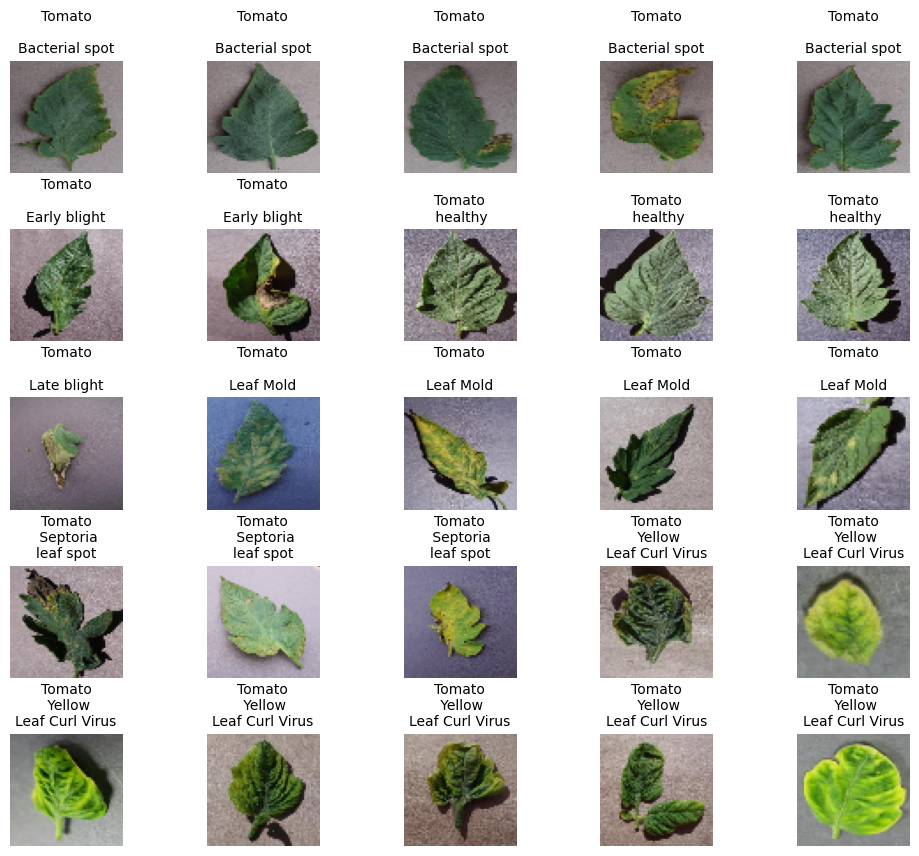

In [76]:
affichage_image(df, "Tomato")

In [82]:
yellow = df["label"].str.contains("Yellow")
rem_yellow = df[~yellow]

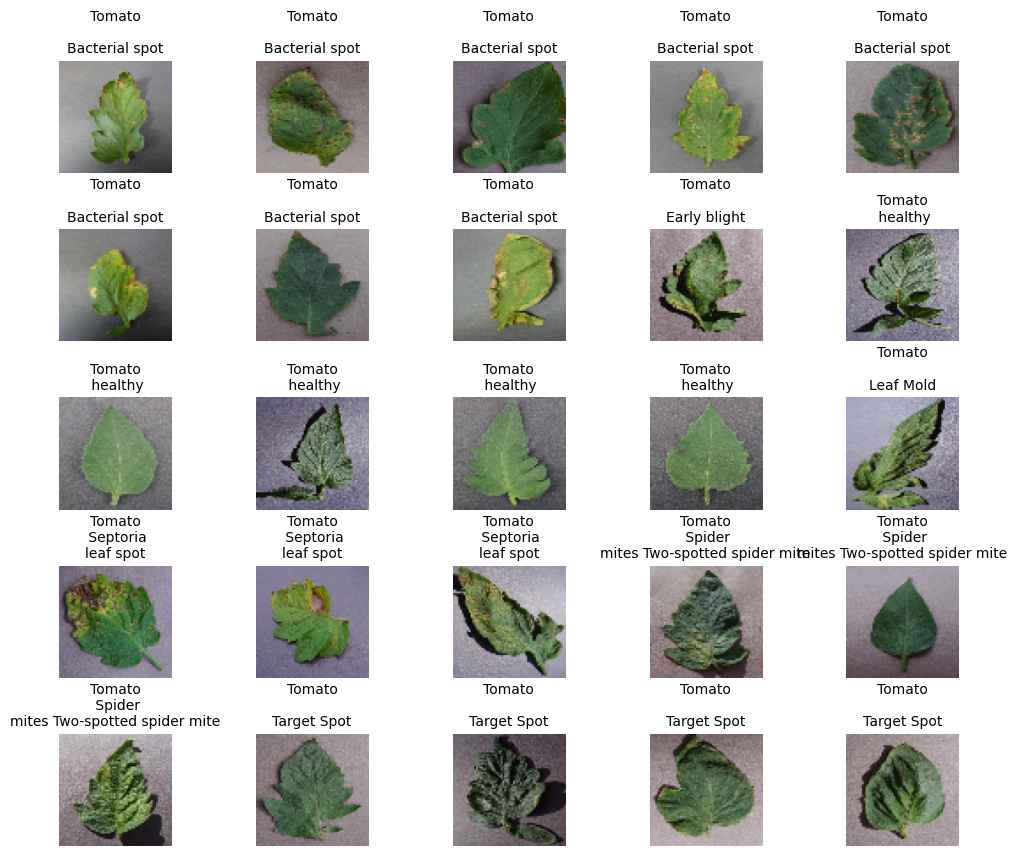

In [83]:
affichage_image(rem_yellow, "Tomato")

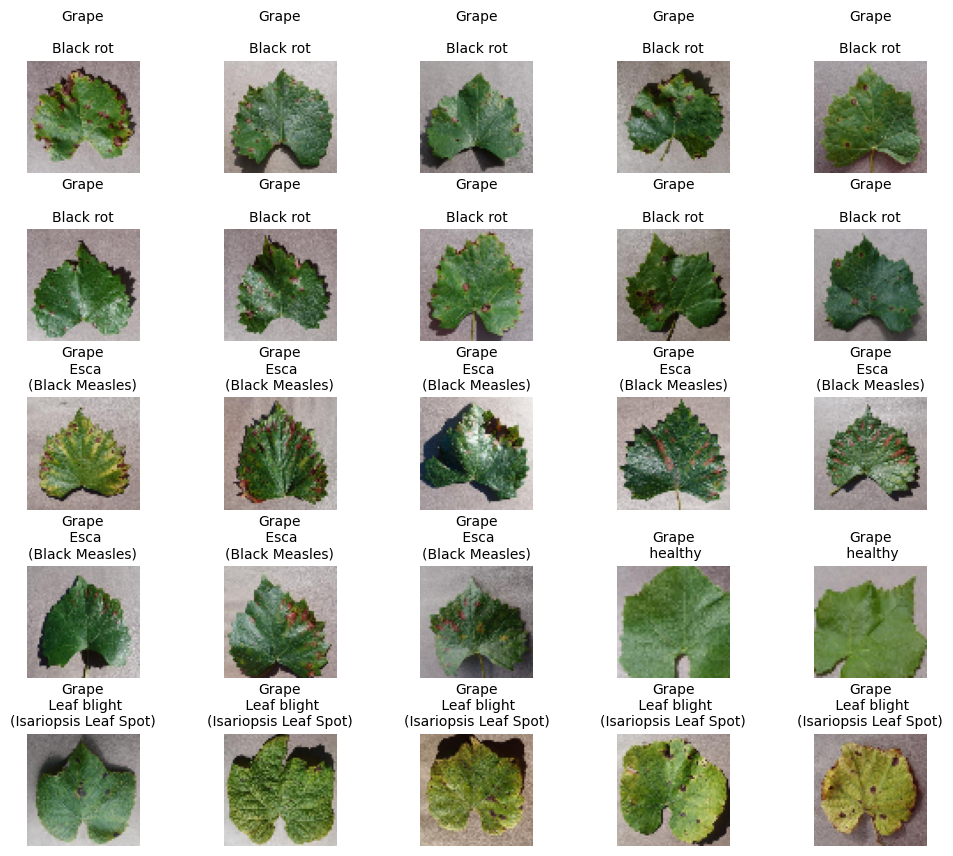

In [74]:
affichage_image(df, "Grape")

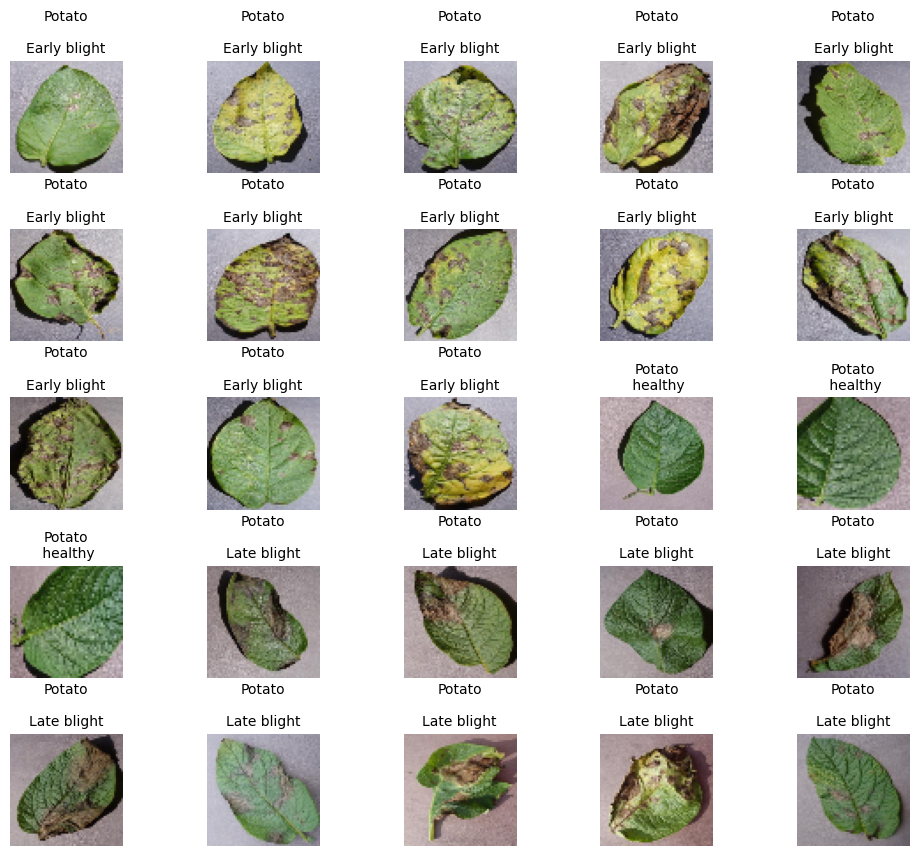

In [78]:
affichage_image(df, "Potato")


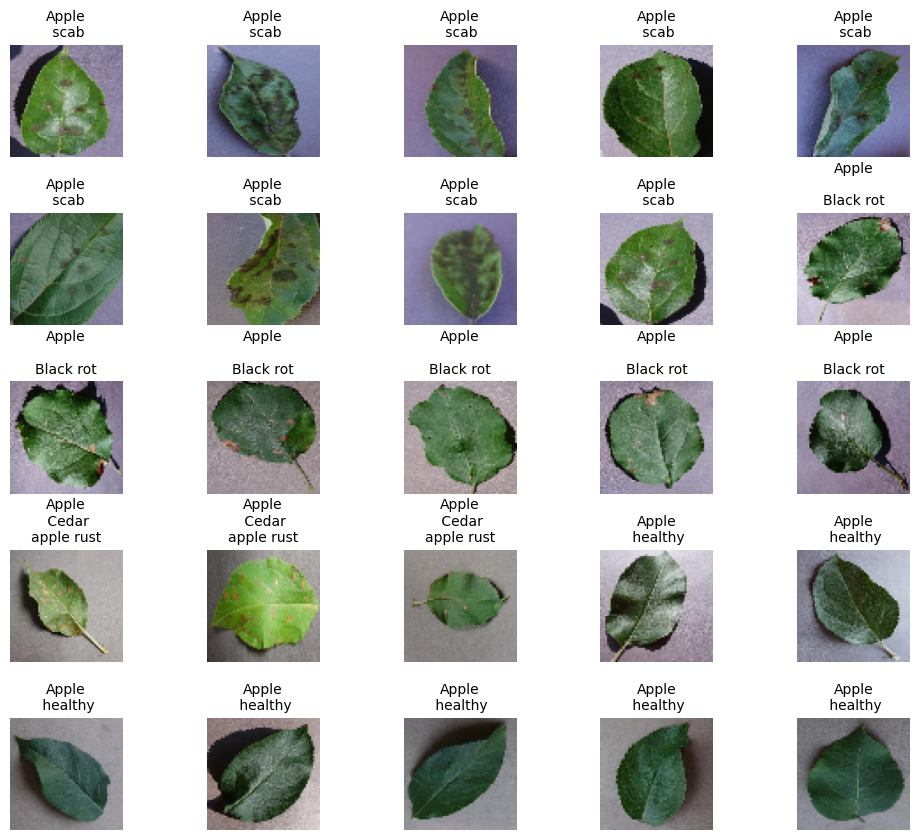

In [79]:
affichage_image(df, "Apple")

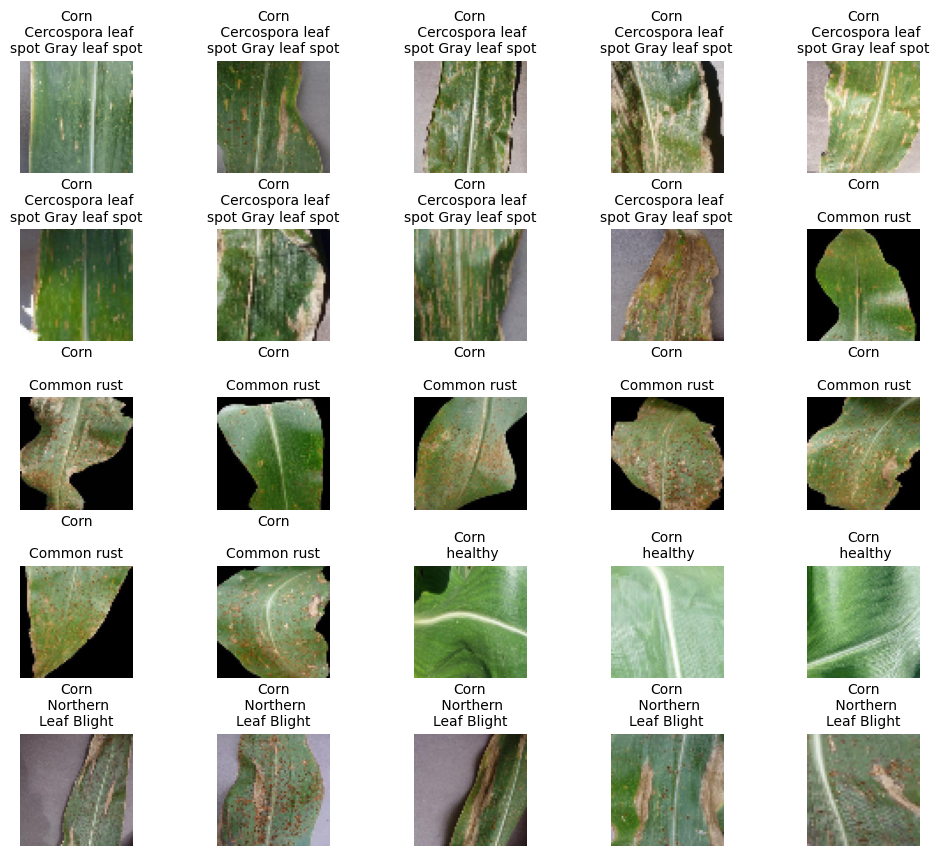

In [80]:
affichage_image(df, "Corn")

In [22]:
x = group_sel["label"]

x_train, x_test = train_test_split(x,  stratify=x, test_size=0.2, random_state=44)

In [23]:
with open(config_overrides.split.train_install_path, "w") as fichier:
    fichier.write(str(x_train.index.tolist()))

In [24]:
with open(config_overrides.split.test_install_path, "w") as fichier:
    fichier.write(str(x_test.index.tolist()))